#### KNN은 오버롤 , 잠재력 예측할때 받은 스케일링된 속성값을 그대로 받은 다음 학습된 KNN모델에 넣어 유사한 선수 10명 됨.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# KNN 분류
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
# StandaraScaler로 정규화
from sklearn.preprocessing import StandardScaler
# 인코딩
from sklearn.preprocessing import LabelEncoder
from category_encoders.target_encoder import TargetEncoder
# KNN 시각화
from pyvis.network import Network
import networkx as nx


In [12]:
DC_df = pd.read_csv('UNGK_DC.csv', encoding='utf-16', index_col=0)
# nongk['player_foot'] 양발은 왼발에 포함, 오른발을 1로 왼발을 2로 바꾸기
DC_df['player_foot'] = DC_df['player_foot'].replace('Both', 'Left')
DC_df['player_foot'] = DC_df['player_foot'].replace('Right', 1)
DC_df['player_foot'] = DC_df['player_foot'].replace('Left', 2)
DC_df.reset_index(drop=True, inplace=True)
# overall, potential예측 속성값 그대로
DC = pd.DataFrame(DC_df[['player_age','passing', 'bravery', 'anticipation','teamwork', 'stamina', 'technique', 'concentration', 'work-rate','composure']])
DC.reset_index(drop=True, inplace=True)
DC
#ss = StandardScaler()
#ss_DC_fit = ss.fit(DC)
#ss_DC = ss_DC_fit.transform(DC)
#ss_DC = pd.DataFrame(ss_DC, columns=DC.columns)
#ss_DC

,player_age,passing,bravery,anticipation,teamwork,stamina,technique,concentration,work-rate,composure
0,32,16,15,16,16,15,16,16,15,17
1,26,14,18,17,16,18,13,15,17,15
2,24,11,18,16,15,16,12,17,17,15
3,29,16,17,16,16,16,16,16,17,18
4,25,14,16,16,14,16,12,13,16,13
...,...,...,...,...,...,...,...,...,...,...
8745,30,10,10,13,10,10,11,10,10,11
8746,26,11,9,11,11,13,12,10,12,12
8747,21,10,9,12,12,12,12,11,12,11
8748,22,10,8,11,14,12,8,10,13,11


In [13]:
# K-최근접 이웃 모델 생성 (n_neighbors=10)
knn_DC = KNeighborsClassifier(n_neighbors=10)

# 모델 학습 타겟값 중요하지 않으니 그냥 다 0으로
knn_DC.fit(DC, np.zeros(len(DC)))  

# iloc에 입력할 값 받기

# ['player_age','passing', 'bravery', 'anticipation','teamwork', 'stamina', 'technique', 'concentration', 'work-rate','composure']
player_age= int(input("나이 입력: "))
player_passing = int(input('패스 능력치 입력: '))
player_bravery = int(input('대담성 능력치 입력: '))
player_acticipation = int(input('예측 능력치 입력: '))
player_teamwork = int(input('협력 능력치 입력: '))
player_stamina = int(input('지구력 능력치 입력: '))
player_technique = int(input('테크닉 능력치 입력: '))
player_concentration = int(input('집중력 능력치 입력: '))
player_workrate = int(input('활동량 능력치 입력: '))
player_composure = int(input('침착성 능력치 입력: '))


# 입력 받은 축구선수 이름으로 해당 행의 인덱스 번호 추출
# row_index = DC[DC['player_real_name'] == ].index[0]


# 선택된 행을 2차원 배열로 변환하여 player_DC에 설정
#player_DC = DC.iloc[row_index, :-1].values.reshape(1,-1)
player_DC = [player_age, player_passing, player_bravery, player_acticipation, player_teamwork, player_stamina, player_technique, player_concentration, player_workrate, player_composure]

X = np.array(player_DC).reshape(1, -1)
#찾기
distances, indices = knn_DC.kneighbors(X)

# 선수 이름 마지막 칼럼에 붙이기
UNGK_DC_name = pd.read_csv('UNGK_DC.csv', encoding='utf-16')
UNGK_DC_name.dropna(axis=0, inplace=True)
UNGK_DC_name.reset_index(drop=True, inplace=True)

DC['player_real_name'] = UNGK_DC_name.iloc[:,1]

#print(f'{ss_DC.iloc[row_index, -1]}와 주변 선수들마다의 거리:', distances)
print('주변 선수들마다의 거리:', distances)
# 해당 인덱스에 해당하는 선수들의 이름 출력
print('플레이어와 가장 유사한 선수 10명:')
for i, idx in enumerate(indices[0], 1):
    print(f'{i}. {DC.loc[idx, "player_real_name"]}')

주변 선수들마다의 거리: [[5.38516481 5.38516481 5.56776436 5.74456265 6.         6.
  6.40312424 6.40312424 6.40312424 6.63324958]]
플레이어와 가장 유사한 선수 10명:
1. Pau Torres
2. Lisandro Martínez
3. Cristian Romero
4. Benjamin White
5. Benjamin Pavard
6. John Stones
7. Ezri Konsa
8. Jan Paul van Hecke
9. Nathan Aké
10. Luke Shaw


c:\Users\Jeong\anaconda3\envs\auto\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


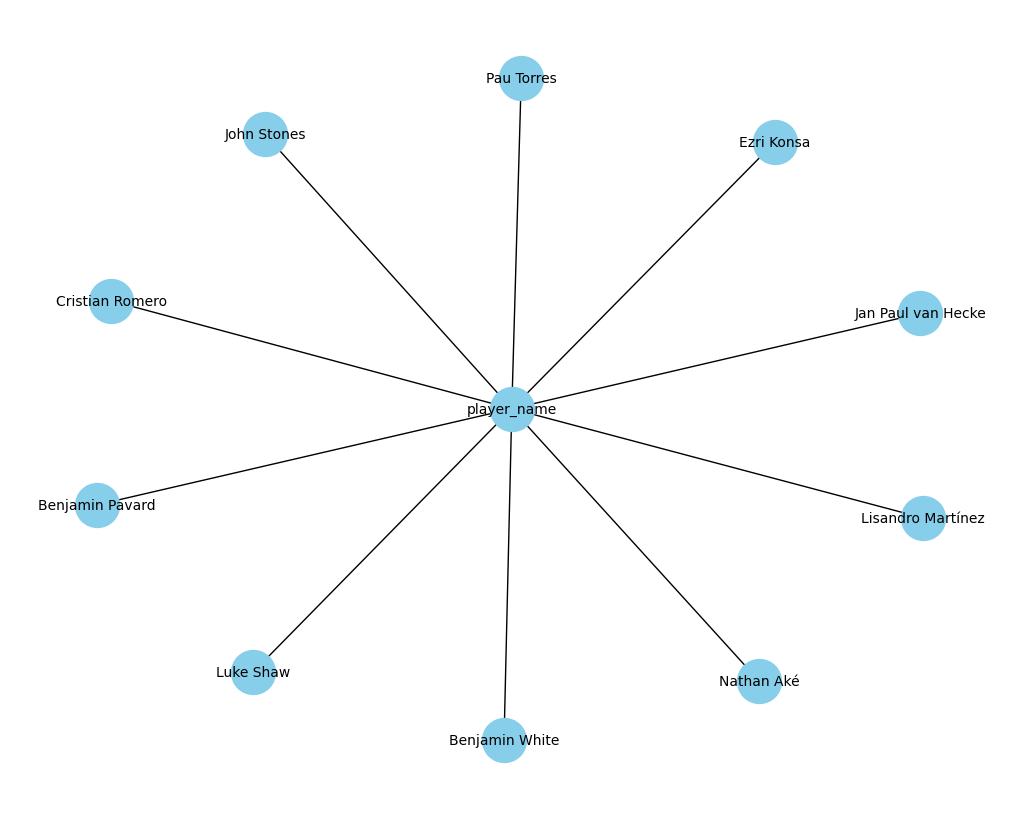

In [16]:

# 네트워크 객체 생성  
#net = Network(
#    notebook = False,
#    directed = False,            # directed graph
##    height = "1000px",          # height of chart
 #   width = "100%",             # fill the entire width
#    bgcolor="#222222", 
#    font_color="white"               
#    )

# 네트워크 객체 생성
net = nx.Graph()

# 노드 추가
net.add_node(1, label=f'player_name')
for i, idx in enumerate(indices[0], 2):
    net.add_node(i, label=f'{DC.loc[idx, "player_real_name"]}')
    # 엣지 추가
    net.add_edge(1, i)


# 노드의 위치 결정
pos = nx.spring_layout(net)

# 노드 라벨 딕셔너리 생성
labels = nx.get_node_attributes(net, 'label')

# 네트워크 시각화
plt.figure(figsize=(10, 8))
plt.style.use('dark_background')
nx.draw(net, pos, with_labels=True, labels=labels, node_size=1000, node_color='skyblue', font_size=10)
plt.show()